# Data Analysis and Data Science with python 
## Task 4: Regression Analysis
### Objective: Build a regression model to predict house prices based on various features using Linear regression

In [1]:
## Importing the required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\House Price Prediction Dataset.csv")
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


### 2. task to perform
#### 1. Load and Explore 

In [3]:
### Cheking for missiong values 
data_miss_values = data.isnull().sum()
print(data_miss_values)

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


#### Obs: no missing values 

In [4]:
data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


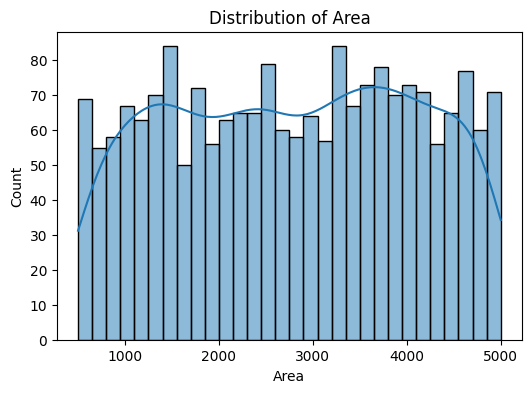

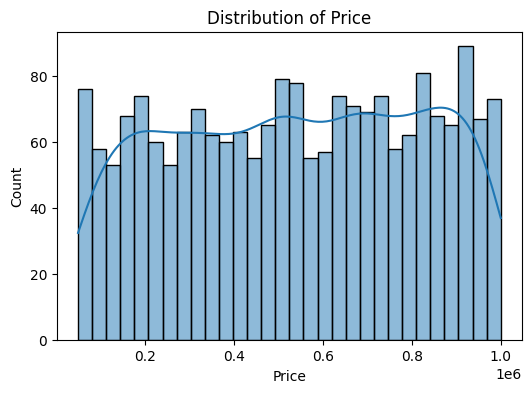

In [6]:
###Distribustion of numerical Variabes 
num_colm =["Area","Price"]
for col in num_colm:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


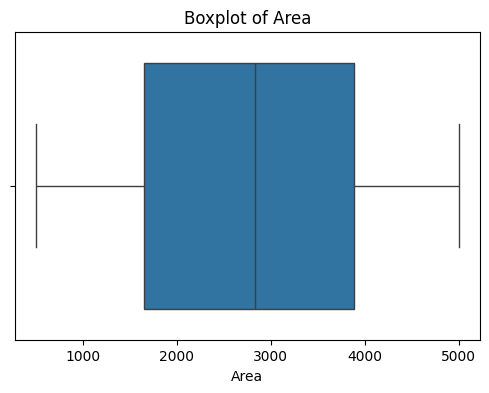

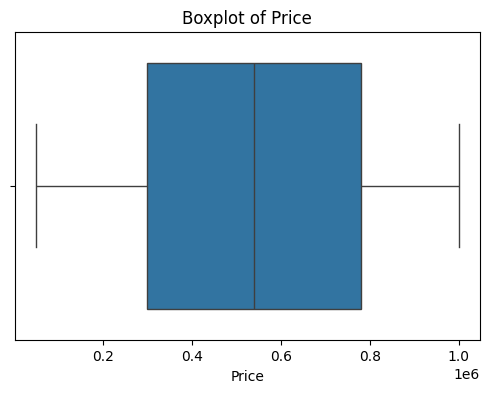

In [7]:
## Identifying outliers using box plot 
for col in num_colm:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

([<matplotlib.patches.Wedge at 0x21d33645010>,
 [Text(0.7038255894883966, 0.8453576400443255, 'Downtown'),
  Text(-0.890933287027777, 0.6451650006516789, 'Urban'),
  Text(-0.689114431736713, -0.857392150635978, 'Suburban'),
  Text(0.8089267783442605, -0.7454109385282562, 'Rural')],
 [Text(0.3839048669936708, 0.46110416729690473, '27.90%'),
  Text(-0.4859636111060601, 0.351908182173643, '24.25%'),
  Text(-0.37588059912911614, -0.46766844580144246, '24.15%'),
  Text(0.4412327881877784, -0.4065877846517761, '23.70%')])

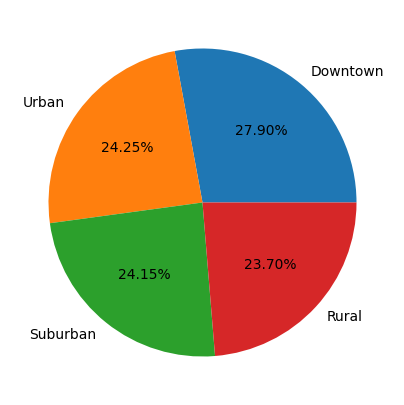

In [8]:
###distribution of location
plt.figure(figsize=(5,5))
plt.pie(data['Location'].value_counts(),labels=data['Location'].value_counts().index,autopct='%1.2f%%')

### Data preproccessing

In [9]:
data.rename(columns={'Area': 'Size','Bedrooms':'No_rooms'}, inplace=True)

In [10]:
data.head()

,Id,Size,No_rooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [11]:
data.head()

,Id,Size,No_rooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


##### Normalizing data and encoding categorical variables and feature Selection

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
data['Condition']=data['Condition'].map({'Poor':0,'Fair':1,'Good':2,'Excellent':3})
data.head()

,Id,Size,No_rooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,3,No,149919
1,2,4272,5,4,3,1958,Downtown,3,No,424998
2,3,3592,2,2,3,1938,Downtown,2,No,266746
3,4,966,4,2,2,1902,Suburban,1,Yes,244020
4,5,4926,1,4,2,1975,Downtown,1,Yes,636056


#### Encoding by Label encoder

In [17]:
le=LabelEncoder()
data['Location']=le.fit_transform(data['Location'])
data.head()

,Id,Size,No_rooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,3,No,149919
1,2,4272,5,4,3,1958,0,3,No,424998
2,3,3592,2,2,3,1938,0,2,No,266746
3,4,966,4,2,2,1902,2,1,Yes,244020
4,5,4926,1,4,2,1975,0,1,Yes,636056


In [18]:
## droping unneccessary coloums
data.drop(columns=['Id', 'YearBuilt','Garage','Bathrooms'], inplace=True)

In [24]:
data.head()

,Size,No_rooms,Floors,Location,Condition,Price
0,1360,5,3,0,3,149919
1,4272,5,3,0,3,424998
2,3592,2,3,0,2,266746
3,966,4,2,2,1,244020
4,4926,1,2,0,1,636056


#### Normalixing the data by using StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=pd.DataFrame(sc.fit_transform(data),columns=data.columns)
data.head()

,Size,No_rooms,Floors,Location,Condition,Price
0,-1.101471,1.401791,1.244151,-1.274332,1.342817,-1.403091
1,1.147485,1.401791,1.244151,-1.274332,1.342817,-0.407725
2,0.622317,-0.704581,1.244151,-1.274332,0.454711,-0.980356
3,-1.405759,0.699667,0.008035,0.486403,-0.433396,-1.062589
4,1.652574,-1.406705,0.008035,-1.274332,-0.433396,0.355982


### Model Training
#### Train-test split

In [28]:
# Train-test split
#from sklearn.model_selection import train_test_split
x=data.drop('Price',axis=1)
y=data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#### Training Linear Regression model 

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred_lin_reg = lin_reg.predict(x_test)


#### Model Evaluation

In [36]:
# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))


In [37]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")

Linear Regression Performance:
MAE: 0.8793728963527301
MSE: 1.0241466142483737
RMSE: 1.0120012916238663
R2 Score: -0.005399338352866101


### Inference:
As MSE and RMSE is slightly above 1 indicates that predictions deviate significantly from actual values and R2 score is negatice means model is not performing well.
So, Linear Regression is not capturing the relatioship between features and house prices.
data may not have linear pattern so may required complex model for prediction 